In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba2k20-player-dataset/nba2k-full.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
df = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [4]:
df = df.dropna()

In [5]:
df.isnull().sum().sum()

0

In [6]:
df = df.drop(['full_name', 'jersey', 'b_day', 'college', 'draft_round', 'draft_peak', 'version'], axis = 1)
df.head()

,rating,team,position,height,weight,salary,country,draft_year
1,97,Los Angeles Clippers,F,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011
3,96,Brooklyn Nets,F,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007
4,96,Houston Rockets,G,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009
5,95,Golden State Warriors,G,6-3 / 1.91,185 lbs. / 83.9 kg.,$40231758,USA,2009
6,94,Los Angeles Lakers,F-C,6-10 / 2.08,222 lbs. / 100.7 kg.,$27093019,USA,2012


In [8]:
df['weight'] = df['weight'].str.extract('(\d+)').astype(float)

In [12]:
df['height'] = df['height'].str.extract('(\d+)-(\d+)').astype(float).apply(lambda x: x[0] * 30.48 + x[1] * 2.54, axis=1)

In [16]:
df['height'] = df['height'].astype(int)

In [18]:
df = df.drop(['draft_year'], axis = 1)

In [21]:
def removehash(value):
    value = value[1:]
    return int(value)

In [22]:
df['salary'] = df['salary'].apply(removehash)
df.head()

,rating,team,position,height,weight,salary,country
1,97,Los Angeles Clippers,F,200,225.0,32742000,USA
3,96,Brooklyn Nets,F,208,230.0,37199000,USA
4,96,Houston Rockets,G,195,220.0,38199000,USA
5,95,Golden State Warriors,G,190,185.0,40231758,USA
6,94,Los Angeles Lakers,F-C,208,222.0,27093019,USA


In [23]:
df

,rating,team,position,height,weight,salary,country
1,97,Los Angeles Clippers,F,200,225.0,32742000,USA
3,96,Brooklyn Nets,F,208,230.0,37199000,USA
4,96,Houston Rockets,G,195,220.0,38199000,USA
5,95,Golden State Warriors,G,190,185.0,40231758,USA
6,94,Los Angeles Lakers,F-C,208,222.0,27093019,USA
...,...,...,...,...,...,...,...
457,88,Toronto Raptors,F,205,227.0,30559200,Cameroon
458,88,Utah Jazz,G,185,211.0,5195501,USA
459,88,Oklahoma City Thunder,G,185,175.0,41358814,USA
460,88,Washington Wizards,G,190,207.0,28751774,USA


In [24]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts()

country
USA          315
Others        31
Canada        15
Australia      8
Name: count, dtype: int64

In [25]:
df['position'].value_counts()

position
G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: count, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le_position = LabelEncoder()
df['position'] = le_position.fit_transform(df['position'])

le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])

le_team = LabelEncoder()
df['team'] = le_team.fit_transform(df['team'])

# Display the correspondence between categories and encoded values
print("Position Classes:", le_position.classes_)
print("Country Classes:", le_country.classes_)
print("Team Classes:", le_team.classes_)

# Display the head of the DataFrame
print(df.head())

Position Classes: [0 1 2 3 4 5 6]
Country Classes: [0 1 2 3]
Team Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
   rating  team  position  height  weight    salary  country
1      97    12         2     200   225.0  32742000        3
3      96     2         2     208   230.0  37199000        3
4      96    10         5     195   220.0  38199000        3
5      95     9         5     190   185.0  40231758        3
6      94    13         3     208   222.0  27093019        3


In [26]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['position'] = le.fit_transform(df['position'])
# df['country'] = le.fit_transform(df['country'])
# df['team'] = le.fit_transform(df['team'])

# df.head()

,rating,team,position,height,weight,salary,country
1,97,12,2,200,225.0,32742000,3
3,96,2,2,208,230.0,37199000,3
4,96,10,5,195,220.0,38199000,3
5,95,9,5,190,185.0,40231758,3
6,94,13,3,208,222.0,27093019,3


In [28]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)

In [31]:
diff = y_test - predictions

/tmp/ipykernel_42/1670086357.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='salary', ylabel='Density'>

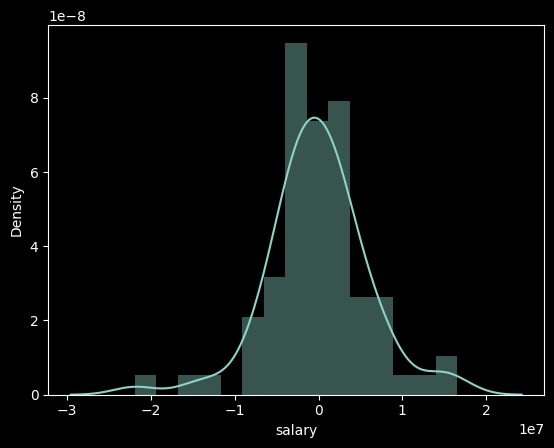

In [32]:
import seaborn as sns
sns.distplot(diff)

In [33]:
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))

In [ ]:
# import pickle
# pickle.dump(lr, open('./model.sav', 'wb'))